# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [2]:
happiness_df=pd.read_csv("world-happiness-report-2019.csv")

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
happiness_df [:7]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [4]:
# интересующие нас столбцы не могут представить данных по Катару, непонятно за что его поставили на 29 место...
freedom = happiness_df['Freedom']
pos_affect = happiness_df['Positive affect']
freedom.isnull().sum(), pos_affect.isnull().sum()

(1, 1)

In [5]:
#удалим Катар и другие страны с закрытой для рейтинга статистикой с карты мира...в смысле счастья. 
happiness_df = happiness_df[happiness_df['Positive affect':'Healthy life expectancy'].notna()]
happiness_df

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [Positive affect] of <class 'str'>

Упс...не вышло. не пойму почему, кстати, прошу пояснить,что я делаю здесь не так. Попробуем по-другому.

In [6]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [7]:
happiness_df = happiness_df[happiness_df['Positive affect'].notna() & happiness_df['Corruption'].notna()]
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           148 non-null object
Ladder                     148 non-null int64
SD of Ladder               148 non-null int64
Positive affect            148 non-null float64
Negative affect            148 non-null float64
Social support             148 non-null float64
Freedom                    148 non-null float64
Corruption                 148 non-null float64
Generosity                 148 non-null float64
Log of GDP
per capita      144 non-null float64
Healthy life
expectancy    142 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.9+ KB


Уже лучше. но...давайте все же причешем данные до конца

In [8]:
happiness_df = happiness_df[happiness_df['Log of GDP per capita'].notna() & happiness_df['Healthy life expectancy'].notna()]
happiness_df.info()

KeyError: 'Log of GDP per capita'

Пффф...причем такое с обоими последними столбцами. ОК. поступим по-другому

In [9]:
happiness_df.dropna (inplace=True)
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           140 non-null object
Ladder                     140 non-null int64
SD of Ladder               140 non-null int64
Positive affect            140 non-null float64
Negative affect            140 non-null float64
Social support             140 non-null float64
Freedom                    140 non-null float64
Corruption                 140 non-null float64
Generosity                 140 non-null float64
Log of GDP
per capita      140 non-null float64
Healthy life
expectancy    140 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.1+ KB


In [10]:
#приведем столбцы рейтинга к типу int, т.к. судя по всему, данные, - это места стран в той или иной номинации
happiness_df['Positive affect':'Generosity'].astype(int)

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [Positive affect] of <class 'str'>

Прошу пояснить и это. Заранее спасибо. ОК. сосредоточимся на наших двух столбцах...

(array([1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.]),
 array([  1.  ,   1.77,   2.54,   3.31,   4.08,   4.85,   5.62,   6.39,
          7.16,   7.93,   8.7 

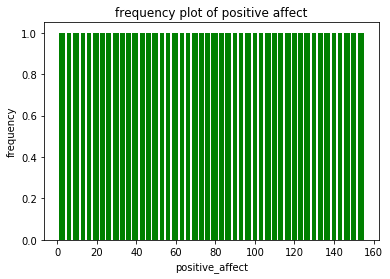

In [18]:
#построим частотный график для freedom и positive affect:
plt.title('frequency plot of positive affect')
plt.xlabel('positive_affect')
plt.ylabel('frequency')
plt.hist(pos_affect,bins = 200,facecolor='g')

Text(0, 0.5, 'frequency')

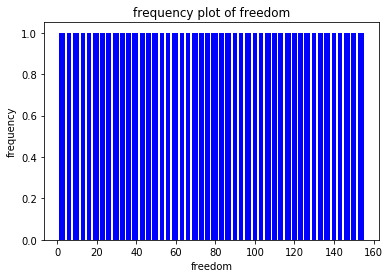

In [19]:
#интересное наблюдение вывода относительно положения в коде plt.hist
plt.hist(freedom,bins = 200, facecolor='b')
plt.title ('frequency plot of freedom')
plt.xlabel ('freedom')
plt.ylabel ('frequency')

    похоже, графики идентичные => мы имеем равномерное распределение.
    А всё потому что мы строим частотный график, т.е. встречаемость каждого значения для колонок, в которых отображены места той или иной страны в той или иной(в нашем случае - свобода и положительные эмоции) номинации рейтинга счастья)))
    Графики наглядно демонстрируют факт, что на определенном месте в (данном!) рейтинге находится одна и только страна, => в 2019г. ни одна страна не набрала одинакового количества баллов с другой для помещения их на одни места.
    например, Россия-Украина-Белоруссия: 1-3.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [33]:
freedom = happiness_df['Freedom'] #переопределим наши переменные
pos_affect = happiness_df['Positive affect']

In [31]:
freedom.median()

79.5

In [34]:
freedom.mode #что означает 5.0 в "bound method Series.mode of 0    5.0" - и кстати, если речь идёт о
#нахождении моды в ряду чисел от 1 до 148..., что действительно будет правильным? или речь о нахождении цифры? тогда "1"

<bound method Series.mode of 0        5.0
1        6.0
2        3.0
3        7.0
4       19.0
5       11.0
6       10.0
7        8.0
8        9.0
9       26.0
10      17.0
11      16.0
12      93.0
13      28.0
14      63.0
15      33.0
16      44.0
17      53.0
18      62.0
19      58.0
21      12.0
22      71.0
23      69.0
25      98.0
26      25.0
29      95.0
30      32.0
31      84.0
32      30.0
33      20.0
       ...  
124     27.0
125    130.0
126    125.0
127    110.0
128    116.0
129     55.0
130     29.0
131    142.0
132    141.0
133    106.0
135     99.0
136    129.0
137     73.0
138    120.0
139     41.0
140     94.0
141    148.0
142    146.0
143     97.0
144    135.0
145     96.0
146    152.0
147     60.0
149     65.0
150    147.0
151     21.0
152     78.0
153    155.0
154    133.0
155    154.0
Name: Freedom, Length: 140, dtype: float64>

In [35]:
statistics.mode(freedom) #очевидно, модуль работает не всегда

StatisticsError: no unique mode; found 140 equally common values

In [36]:
freedom.mean(),freedom.sum()/len(freedom) #мат. ожидание и среднее значение

(78.82857142857142, 78.82857142857142)

In [37]:
freedom_std = np.std(freedom) #стандартное отклонение
freedom_std 

44.9475794449399

In [38]:
freedom_var = np.var(freedom)#дисперсия
freedom_var, freedom_std**2 

(2020.2848979591834, 2020.2848979591836)

In [39]:
max(freedom),min(freedom) #максимум и минимум

(155.0, 1.0)

In [40]:
freedom.isnull().sum() #выбросов нет, от них мы избавились выше

0

In [41]:
freedom_range = max(freedom) - min(freedom) #размах
freedom_range

154.0

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

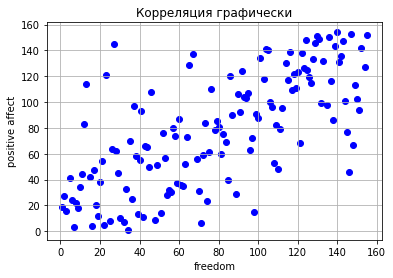

In [42]:
x = freedom #корреляция между freedom и positive affect графически
y = pos_affect
plt.title('Корреляция графически')
plt.xlabel('freedom')
plt.ylabel('positive affect')
plt.grid(True)
plt.scatter(x, y, c = 'blue')

In [56]:
corr, p_value = sts.pearsonr(x, y) #Коэффициент корреляции Пирсона и p-значение
corr, p_value

(0.6965670458090686, 1.2239087557813245e-21)

In [44]:
np.corrcoef(x, y)[0, 1] #Коэффициент корреляции Пирсона

0.6965670458090685

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [46]:
freedom1 = freedom - statistics.mean(freedom) #центрирование
statistics.mean(freedom1)

6.496390726949487e-15

In [47]:
min(freedom1), max(freedom1) #масштабирование

(-77.82857142857142, 76.17142857142858)

In [51]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom1 = min_max_scaler.fit_transform(np.array(freedom1).reshape(-1, 1))
min(freedom1),max(freedom1)

(array([-1.]), array([1.]))

Построить матрицу корреляций для всех колонок таблицы

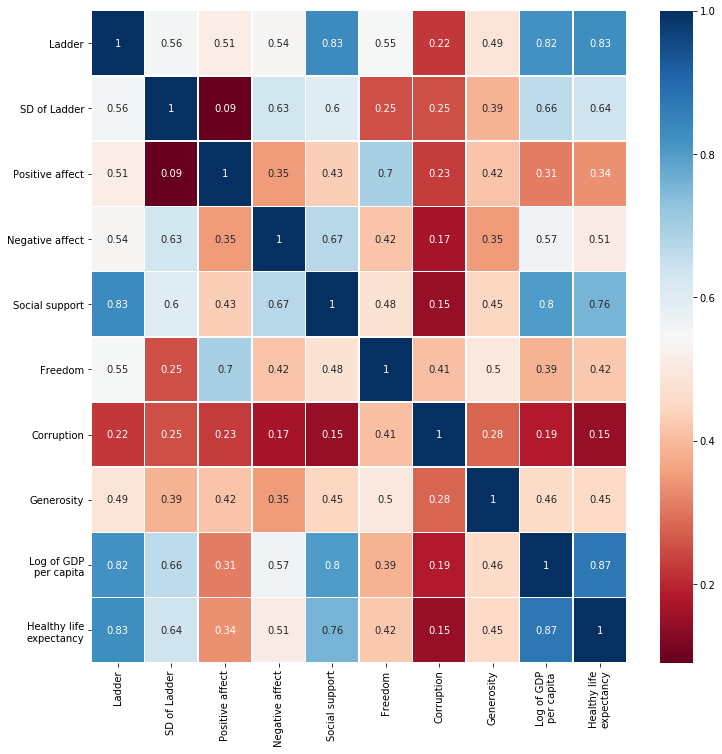

In [59]:
import seaborn as sns
plt.subplots(figsize=(12, 12))
sns.heatmap( happiness_df.corr(), annot=True, cmap='RdBu',linewidths=.5) #make it red

Загрузить следующую таблицу: 

In [61]:
import io
import requests
avocado_df=pd.read_csv("avocado.csv")
avocado_df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

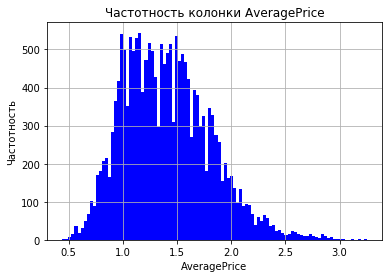

In [66]:
n, bins, patches = plt.hist(avocado_df['AveragePrice'], 100, facecolor='b')
plt.title('Частотность колонки AveragePrice')
plt.xlabel('AveragePrice')
plt.ylabel('Частотность')
plt.grid(True)

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Text(0, 0.5, '4046')

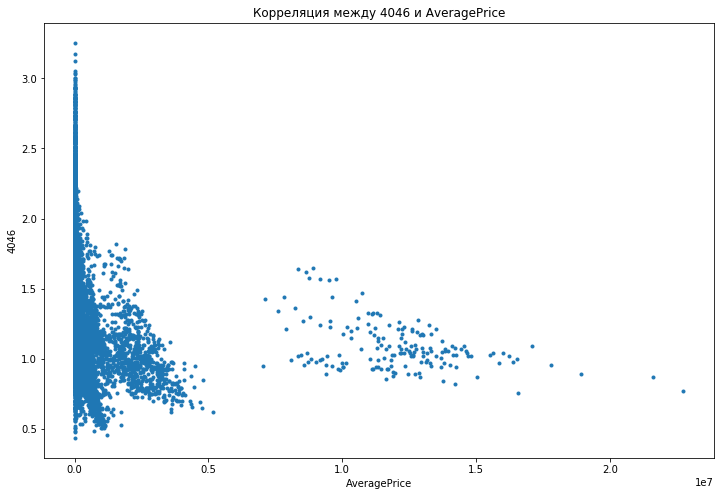

In [69]:
x_axis = 'AveragePrice'
y_axis = '4046'
x = avocado_df[y_axis]
y = avocado_df[x_axis]

plt.figure(figsize=(12, 8))
plt.scatter(x, y, marker='.')

plt.title(f'Корреляция между {y_axis} и {x_axis}')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
